<a href="https://colab.research.google.com/github/eckoecho/Prediction-of-Product-Sales/blob/Version-1/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





#**Prediction of Product Sales**
**Author:**Echo Diaz

**Last Updated:** May 2023


## **Project Overview**


## **Load and Inspect Data**

In [130]:
#Importing the necessary libraries
import pandas as pd
import missingno as msno
import seaborn as sns

In [131]:
#Setting the path to pull our data
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"

In [132]:
#Converting our CSV into a dataframe
df = pd.read_csv(fpath)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [133]:
#Checking for various aspects: column & row count, data types, and any nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## **Clean Data**

### Overview of Our Data

In [134]:
#Looking at the numbr of rows and columns
df.shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 8523 rows and 12 columns.


In [135]:
#Data Types for Each Feature
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

7 columns have objects as their data types.
5 columns have floats as their data types.
1 column is an integer as their data type.

In [136]:
#Checking for duplicates within all rows
duplicated_rows = df.duplicated()
duplicated_rows.sum()

0

There are no duplicates to drop.

In [137]:
#Looking throughout the rows for nulls
null_sums = df.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

The results show 2 columns with missing data: 
- `Item_Weight` 
- `Outlet_Size`

In [138]:
#This allows me to see if i should drop any columns with a lot of missing data
null_percentage = null_sums/len(df) * 100
null_percentage

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

<Axes: >

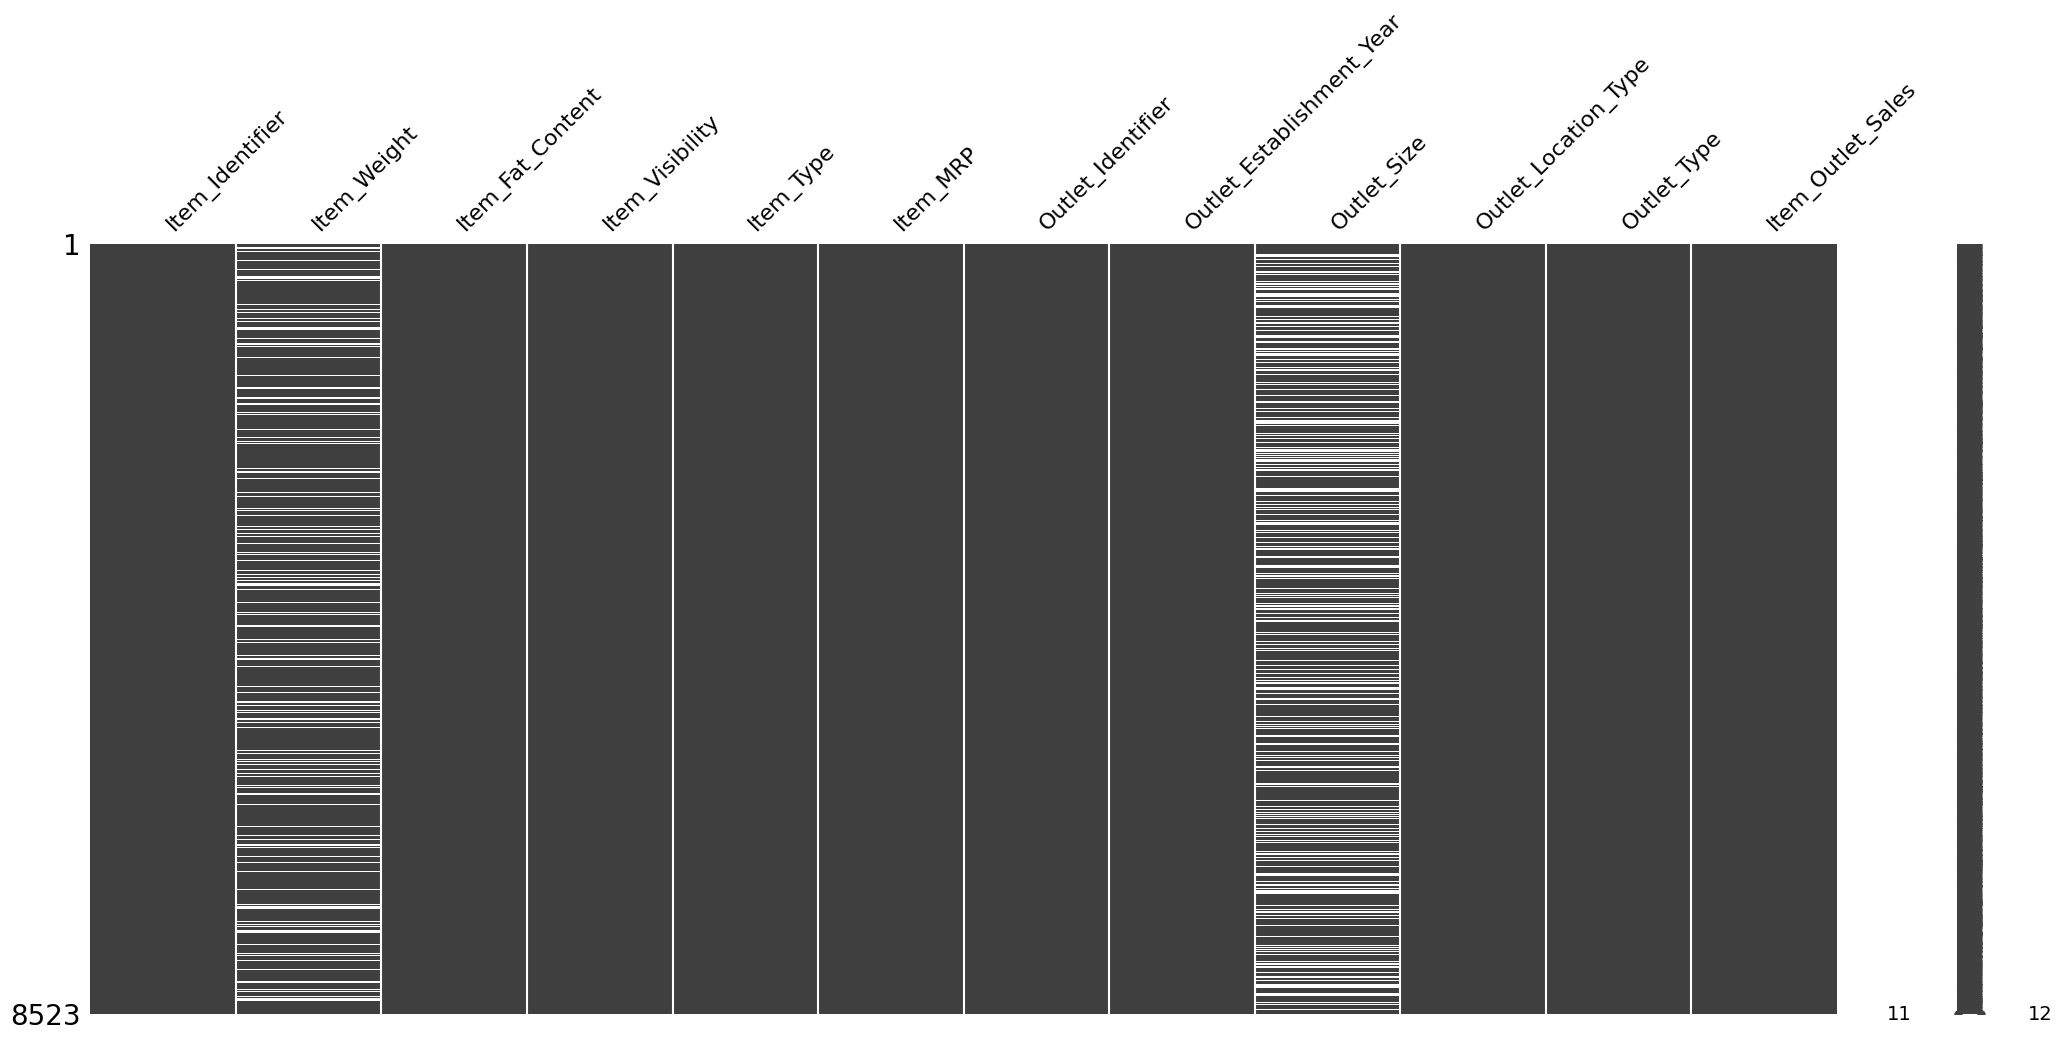

In [139]:
#A quick visualization of where the nulls equal white spaces
#This corresponds with out perecntages above
msno.matrix(df)

### `Item_Weight` Cleaning

I will clean one column at a time starting with `Item_Weight`. I'll be filling any missing `Item_Weight` with the median value because it's unaffected by extreme outliers.

In [140]:
#Viewing the value count for the majority of the rows in the Item Weight column
df["Item_Weight"].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [141]:
#Finding out the middle value of Item Weight to fill in nulls
item_weight_median = df["Item_Weight"].median()
item_weight_median

12.6

In [142]:
#Filling missing values in middle value in Item Weight
df["Item_Weight"] = df['Item_Weight'].fillna(item_weight_median)
df['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [143]:
#Now checking to ensure nulls dont exist anymore
df['Item_Weight'].isna().sum()

0

Zero means we successfully cleaned up the `Item_Weight` feature.

### `Outlet_Size` Cleaning

The next column to clean is `Outlet_Size`.  First, I'll fill the null values then I'll adjust the values from `Small`,`Medium`, `High` to `Small`, `Medium`, `Large`. 

In [144]:
#Checking to see how many null values in Outlet_Size
df["Outlet_Size"].isna().sum()

2410

In [145]:
#Viewing the value count for the Outlet_Size column to view if there any value outlier
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [146]:
#Medium is the most common value so i will be replacing the null values with Medium
df["Outlet_Size"] = df["Outlet_Size"].fillna("Unknown")
df["Outlet_Size"].isna().sum()
#We can now see that our Outlet_Size feature has no missing values

0

In [147]:
#Now our dataset has values for each feature
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Adjust the values from `Small`,`Medium`, `High` to `Small`, `Medium`, `Large`. 

In [148]:
#Replace "High" with "Large"
df['Outlet_Size'] = df['Outlet_Size'].replace({"High":"Large"})
#Get the value counts for our column
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
Large       932
Name: Outlet_Size, dtype: int64

### Categorical Columns Cleaning

This section we identify the categorical columns to fix string inconsistences.

In [149]:
#Fixing string inconsistencies
#First, obtaining all features with string values
str_cols = df.select_dtypes(include="object")
str_cols

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Unknown,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,Large,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,Large,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Unknown,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


I use code to give us all of the values counts for our categorical columns.

In [150]:
#Looping thru each column and getting value_counts to see out of place values in each feature
for col in str_cols:
    print(f"Value counts for {col}: ")
    print(df[col].value_counts())  
    #Increase readibility with new lines between results
    print("\n")


Value counts for Item_Identifier: 
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value counts for Item_Fat_Content: 
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value counts for Item_Type: 
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value counts for Outlet_Identifier: 
OUT027    935
OUT013    932
OUT049    930
OUT046

There are inconsitencies in our `Item_Fat_Content` values such as "low fat" instead of "Low Fat", etc. I will standardize these values through my code.

In [151]:
#Create a dictionary to replace {Old:New}
rename_dict = {"low fat": "Low Fat",
               "LF": "Low Fat",
               "reg": "Regular"}

In [152]:
#Item_Fat_Content values are inconsistent, going to standardize with .str.replace
#Convert using .str.replace("old","new")
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(rename_dict, regex=True)
df['Item_Fat_Content'].value_counts()
#We now have standardized our Item_Fat_Content feature

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Numerical Stats After Cleaning

Taking a quick look at our numericals stats to ensure we don't have extreme outliers.

In [153]:
#For any numerical columns, I obtain the summary statistics of each (min, max, mean).
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


## **Exploratory Data Analysis**

In [154]:
#Calling our dataframe
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Large,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Unknown,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## Histograms



Our histogram displays the number of stores that sold around 0 to 13,000. This histogram has a negative skew, meaning more stores sold between 0-2000 than the number of stores that sold between 2000-4000. This downward trend continues to the last range of 12,000 to 13,000.





<ipython-input-155-8d1f9302e051>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


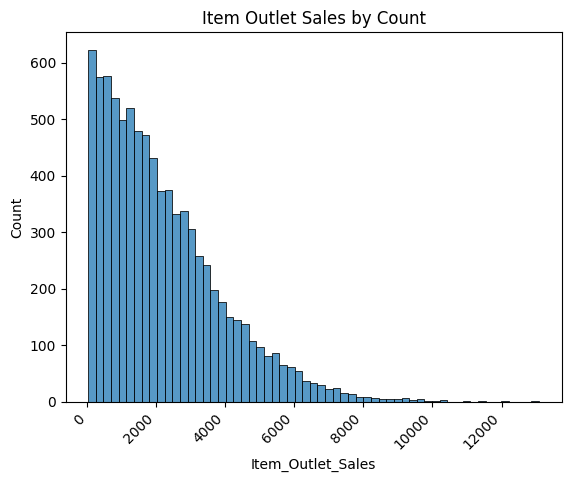

In [155]:
# Putting Item Type in a Histograph
ax = sns.histplot(df, x="Item_Outlet_Sales");
#Rotating and setting horizontal alignment for x category labels for better visibility
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title("Item Outlet Sales by Count");

In [156]:
#checking stats on Item Outlet Sales
df["Item_Outlet_Sales"].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

## Boxplots

Showing numerical distribution of `Item_Oulet_Sales` (median, interquartile,min, max, and outliers).

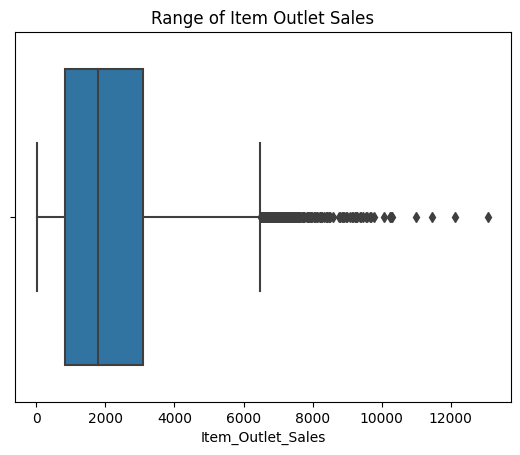

In [157]:
#Displaying Outlet sales as boxplot
ax = sns.boxplot(df, x="Item_Outlet_Sales")
ax.set_title("Range of Item Outlet Sales");

Comparing the median number of sales based on established outlet year.

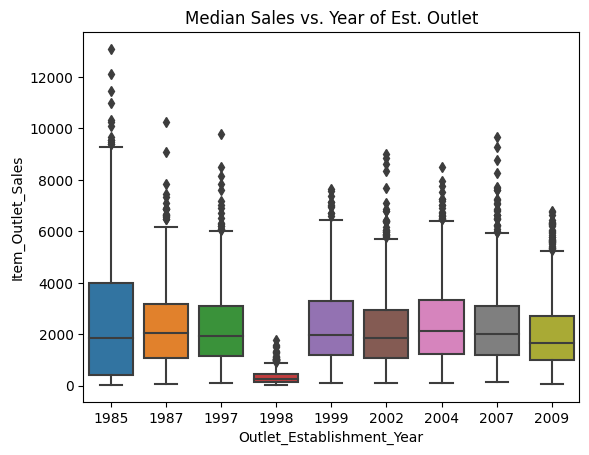

In [158]:
#Outlet_Establishment_Year vs. Item_Outlet_Sales
ax = sns.boxplot(df, x="Outlet_Establishment_Year", y="Item_Outlet_Sales")
ax.set_title("Median Sales vs. Year of Est. Outlet");

## Barplot

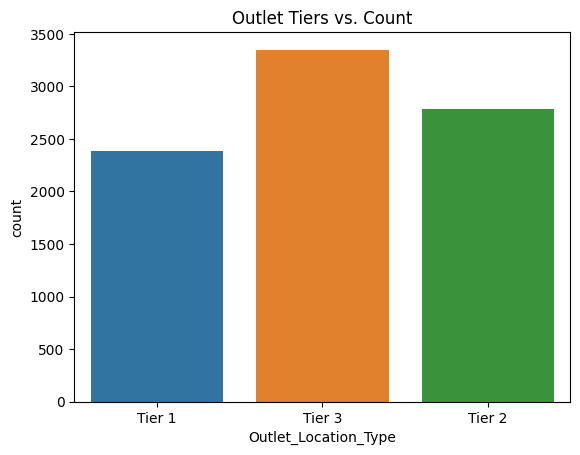

In [162]:
ax = sns.countplot(df, x="Outlet_Location_Type");
ax.set_title("Outlet Tiers vs. Count");

As we look at the mean sales value for each tier, having a Tier 1 store doesn't necessary produce more sales. Let's take a look at our numeric correlations to see positive trends in our features.

## Heatmap

In [163]:
#Finding correlation between our numeric data
corr = df.corr(numeric_only = True)
#Rounding off for visibility
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.02,0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


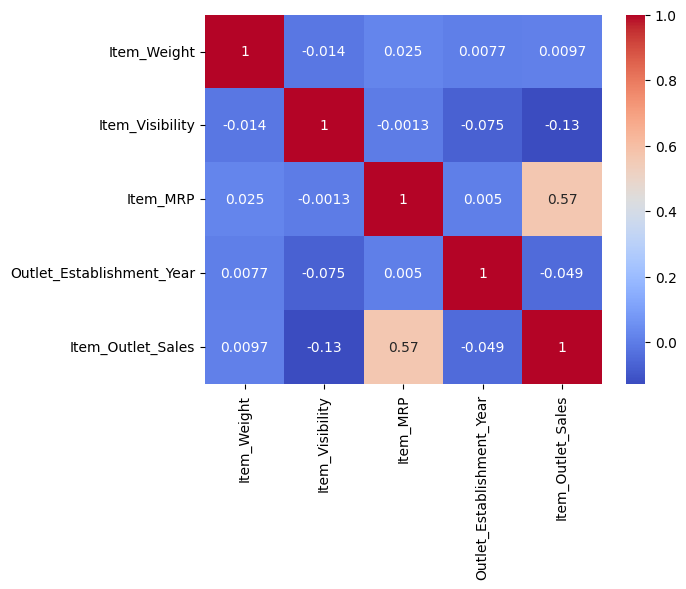

In [164]:
#Creating a heatmap to easily show correlations in our numeric data
sns.heatmap(corr, cmap="coolwarm", annot=True);

Our heatmap easily shows the weak and strong correlation between two variables.  For instance, `Item_Outlet_Sales` & `Item_Weight` have a weak correlation together than `Item_Outlet_Sales` & `Item_MRP`, which has a moderately strong correlation.

## **Explanatory Data Analysis**

Our goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

Our target is to increase `Item Sales per Outlet`, so we inspect `Item MRP` to see if that contributes to higher sales.

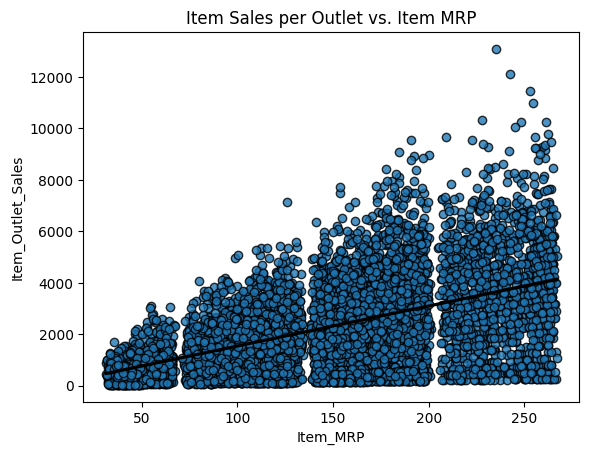

In [165]:
ax = sns.regplot(df, y="Item_Outlet_Sales", x="Item_MRP", scatter_kws={"edgecolor":"black"}, line_kws={"color":"black"})
ax.set_title("Item Sales per Outlet vs. Item MRP");

From our scatterplot, we see that there is a positive trendline, meaning the more expensive an `Item_MRP` leads to higher `Item_Outlet_Sales`.

# Add dollar sign to Sales
We see that outlets sales from 0-2000 mostly sell cheaper products as our points are in tighter clusters then more expensive items.

This point is also displayed on our outlet that sell more, they sell more expensive items.

In these I conclude, outlets that selling more expensive items could lead to higher sales.  But, what *type of foods* are contributing to higher sales?  Next, we explore those categories.

In [ ]:
ax=sns.histplot(df, x="Item_Type");
ax.set_title("Types of Products");
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");

#order these from greatest to least
This shows the quantity of items per food category. We see that the top counts of food categories include:

1. Fruits and Vegetables
2. Snack Foods
3. Household
4. Frozen Foods




In [166]:
fruit_veg = df["Item_Type"] == "Fruits and Vegetables"
snacks = df["Item_Type"] == "Snack Foods"

------------------------------

Just take the top 3-5 categories and chart those scatter plots, like below:

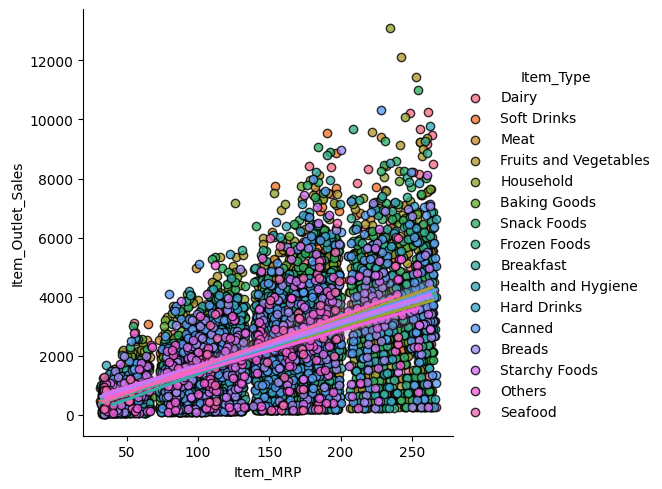

In [167]:
 ax = sns.lmplot(df, y="Item_Outlet_Sales", x="Item_MRP", hue="Item_Type", scatter_kws={"edgecolor":"black"})

In [182]:
order = df.sort_values(by="Item_Outlet_Sales", ascending=False)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


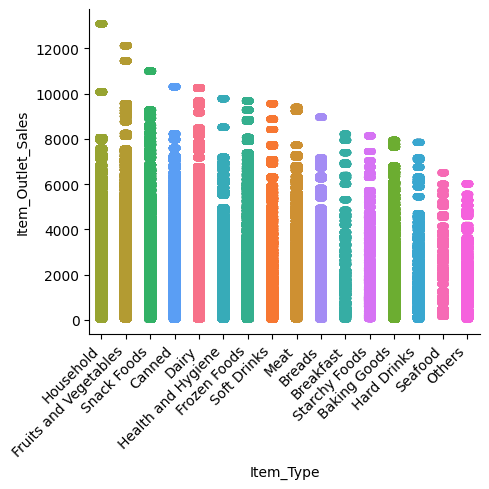

In [188]:
g = sns.catplot(data=df, y="Item_Outlet_Sales", x="Item_Type", hue="Item_Type", order=df.sort_values(by="Item_Outlet_Sales", ascending=False).Item_Type, edgecolor="white")
g.set_xticklabels(label="Item_Type", rotation=45, ha="right");
g.tight_layout();

In this category plot, the columns with more scatter points include:
* Dairy
* Fruits and Vegetables
* Snack Foods
* Canned

<mark>This information seems to indicate the need for fast and low-effort foods.  Adding more ready-made or on-the-go foods may help to raise outlet sales.

In [ ]:
ax= sns.barplot(data=df, y="Item_Outlet_Sales", x="Item_Type");
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");
ax.grid(ls="--");

Shows the average number of outlet sales per food category. Remember the outliers arent shown here but they will raise the average per category. Seafood is a good example of having high average sales but our solid black line means there are outliers that skew average. 

In [ ]:
ax = sns.boxenplot(data=df, x="Item_Outlet_Sales", y="Item_Type")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");

#Also order from great to least
Shows the middle range category vs the Outlet Sales. These shows the outliers that can contribute to greater the outlet sales.

----------
Percentage of sales toward each top category.
* Fruits and Vegetables
* Snack Foods
* Household
* Frozen Foods
* Dairy



In [ ]:
#Getting the percentage of each food category
#Adding normalize=True to .value_counts provides ratio (mult by 100 for percentage)
item_type_count = df["Item_Type"].value_counts(normalize=True) *100
item_type_count

In [ ]:
per_item_sales = df.groupby("Item_Outlet_Sales")["Item_Type"].sum()
per_item_sales#.sort_values(ascending=False)

In [ ]:
#Item mpr vs Food Category
ax = sns.barplot(df, x="Item_Type", y="Item_MRP") #order=df.sort_values("Item_Type"))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");